Phase - 3

SQL Operations

Note:

- Create a separate table for each file and give a meaningful name.
- When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.

# 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [31]:
# importing the structed query language. 
import sqlite3

In [35]:
# connecting with the database(if there is no existing dataset, It will create one)
db = sqlite3.connect("Women_crime.db")

In [36]:
# declaring the cursor
cursor = db.cursor()

In [37]:
cursor.execute("""
CREATE TABLE Women_crime (
    "STATE/UT" TEXT, 
    DISTRICT TEXT, 
    Year INT, 
    Rape INT, 
    "Kidnapping and Abduction" INT, 
    "Dowry Deaths" INT, 
    "Assault on women with intent to outrage her modesty" INT, 
    "Insult to modesty of Women" INT, 
    "Cruelty by Husband or his Relatives" INT, 
    "Importation of Girls" INT
)
""")

In [43]:
with open(r"C:\Users\Country Head\Desktop\Districtwise_crime_against_women.csv", 'r') as file:
    no_records = 0 
    for row in file:
        cursor.execute("INSERT INTO Women_crime VALUES(?,?,?,?,?,?,?,?,?,?)", row.split(","))
        db.commit()
        no_records += 1

print(no_records, 'Records Inserted')

8597 Records Inserted


# 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [38]:
#To find the highest number of rapes that happened in which state, District, and year

In [45]:
cursor.execute("""SELECT "STATE/UT", DISTRICT, Year, Rape FROM Women_crime WHERE Rape = (SELECT MAX(Rape) FROM Women_crime)
""")
result = cursor.fetchone()
if result:
    print("Rape:")
    print(result)


Rape:
('WEST BENGAL', 'MURSHIDABAD', 2009, 568)


In [ ]:
# To find the highest number of Kidnappings that happened in which state, District, and year

In [46]:
cursor.execute("""
    SELECT "STATE/UT", DISTRICT, Year, "Kidnapping and Abduction" 
    FROM Women_crime
    WHERE "Kidnapping and Abduction" = (SELECT MAX("Kidnapping and Abduction") FROM Women_crime)
""")
result = cursor.fetchone()
if result:
    print("Highest Reported Kidnappings and Abductions:")
    print(result)


Highest Reported Kidnappings and Abductions:
('WEST BENGAL', 'MURSHIDABAD', 2011, 492)


# 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [1]:
#To find the lowest number of rapes that happened in which state, District, and year

In [48]:
cursor.execute("""SELECT "STATE/UT", DISTRICT, Year, Rape FROM Women_crime WHERE Rape = (SELECT MIN(Rape) FROM Women_crime)
""")
result = cursor.fetchone()
if result:
    print("Rape:")
    print(result)

Rape:
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)


In [49]:
#To find the lowest number of Kidnapping that happened in which state, District, and year

In [50]:
cursor.execute("""
    SELECT "STATE/UT", DISTRICT, Year, "Kidnapping and Abduction" 
    FROM Women_crime
    WHERE "Kidnapping and Abduction" = (SELECT MIN("Kidnapping and Abduction") FROM Women_crime)
""")
result = cursor.fetchone()
if result:
    print("Highest Reported Kidnappings and Abductions:")
    print(result)

Highest Reported Kidnappings and Abductions:
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)


# 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [85]:
db = sqlite3.connect("Crimes_ST.db")

In [73]:
cursor = db.cursor()

In [86]:
cursor.execute("""
CREATE TABLE crimes_ST(
    "STATE/UT" TEXT, 
    DISTRICT TEXT, 
    Year INT, 
    Murder INT,
    Rape INT, 
    "Kidnapping Abduction" INT, 
    "Dacoity" INT, 
    "Robbery" INT, 
    "Arson" INT, 
    "Hurt" INT, 
    "Protection of Civil Rights (PCR) Act" INT,
    "Prevention of atrocities (POA) Act" INT,
    "Other Crimes Against STs")""")

In [87]:
with open(r"C:\Users\Country Head\Desktop\District_ST_Crimes.csv", 'r') as file:
    no_records = 0 
    for row in file:
        cursor.execute("INSERT INTO Crimes_ST VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)", row.split(","))
        db.commit()
        no_records += 1

print(no_records, 'Records Inserted')


8597 Records Inserted


In [89]:
results = cursor.execute("SELECT * FROM Crimes_ST")
for row in results:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, '13\n')
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, '6\n')
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, '0\n')
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, '0\n')
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '14\n')
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, '19\n')
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '2\n')
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, '2\n')
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, '20\n')
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, '18\n')
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, '0\n')
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 

('UTTARAKHAND', 'CHAMPAWAT', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 2, '1\n')
('UTTARAKHAND', 'DEHRADUN', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTARAKHAND', 'HARIDWAR', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTARAKHAND', 'NAINITAL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTARAKHAND', 'PAURI GARHWAL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTARAKHAND', 'PITHORAGARH', 2001, 0, 1, 0, 0, 0, 0, 0, 0, 5, '3\n')
('UTTARAKHAND', 'RUDRA PRAYAG', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTARAKHAND', 'TEHRI GARHWAL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTARAKHAND', 'UDHAMSINGH NAGAR', 2001, 1, 0, 0, 0, 0, 0, 1, 0, 2, '2\n')
('UTTARAKHAND', 'UTTARKASHI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', '24 PARGANAS NORTH', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', '24 PARGANAS SOUTH', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'ASANSOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'BANKURA', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WE

('TAMIL NADU', 'COIMBATORE URBAN', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'CUDDALORE', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'DHARMAPURI', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '2\n')
('TAMIL NADU', 'DINDIGUL', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'ERODE', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'KANCHIPURAM', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'KANYAKUMARI', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'KARUR', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'MADURAI RURAL', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'MADURAI URBAN', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'NAGAPATTINAM', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'NAMAKKAL', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'NILGIRIS', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 1, '0\n')
('TAMIL NADU', 'PERAMBALUR', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, '43\n')
('TAMIL NADU', 'PUDUKOTTAI', 2002,

('TAMIL NADU', 'DINDIGUL', 2003, 0, 0, 0, 0, 0, 0, 1, 0, 0, '0\n')
('TAMIL NADU', 'ERODE', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'KANCHIPURAM', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'KANYAKUMARI', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'KARUR', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'MADURAI RURAL', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'MADURAI URBAN', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'NAGAPATTINAM', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'NAMAKKAL', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'NILGIRIS', 2003, 0, 1, 0, 0, 0, 0, 0, 0, 1, '0\n')
('TAMIL NADU', 'PERAMBALUR', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '29\n')
('TAMIL NADU', 'PUDUKOTTAI', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'RAMNATHAPURAM', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'SALEM RURAL', 2003, 0, 1, 0, 0, 0, 0, 2, 0, 0, '0\n')
('TAMIL NADU', 'SALEM URBAN', 2003,

('MAHARASHTRA', 'GONDIA', 2004, 0, 1, 0, 0, 0, 0, 0, 0, 0, '1\n')
('MAHARASHTRA', 'HINGOLI', 2004, 0, 0, 1, 0, 0, 1, 1, 0, 0, '2\n')
('MAHARASHTRA', 'JALGAON', 2004, 0, 1, 0, 0, 0, 0, 0, 0, 0, '4\n')
('MAHARASHTRA', 'JALNA', 2004, 0, 1, 0, 0, 0, 0, 0, 0, 0, '2\n')
('MAHARASHTRA', 'KOLHAPUR', 2004, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'LATUR', 2004, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'MUMBAI', 2004, 0, 1, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'MUMBAI RLY.', 2004, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'NAGPUR COMMR.', 2004, 0, 1, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'NAGPUR RLY.', 2004, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'NAGPUR RURAL', 2004, 0, 0, 0, 0, 0, 0, 0, 0, 2, '2\n')
('MAHARASHTRA', 'NANDED', 2004, 0, 0, 0, 1, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'NANDURBAR', 2004, 0, 3, 0, 0, 0, 0, 2, 0, 11, '6\n')
('MAHARASHTRA', 'NASIK COMMR.', 2004, 0, 0, 0, 0, 0, 0, 0, 0, 1, '1\n')
('MAHARASHTRA', 'NASIK RURAL', 2004, 0, 2

('GUJARAT', 'AMRELI', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1\n')
('GUJARAT', 'ANAND', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('GUJARAT', 'BHARUCH', 2005, 1, 1, 0, 0, 0, 0, 6, 0, 7, '7\n')
('GUJARAT', 'BHAVNAGAR', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1\n')
('GUJARAT', 'DAHOD', 2005, 0, 0, 0, 15, 18, 0, 0, 0, 5, '5\n')
('GUJARAT', 'GANDHINAGAR', 2005, 0, 1, 1, 0, 0, 0, 0, 0, 0, '0\n')
('GUJARAT', 'HIMATNAGAR', 2005, 0, 3, 1, 0, 0, 0, 3, 0, 2, '2\n')
('GUJARAT', 'JAMNAGAR', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('GUJARAT', 'JUNAGADH', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1\n')
('GUJARAT', 'KHEDA NORTH', 2005, 0, 1, 0, 0, 0, 0, 0, 0, 0, '1\n')
('GUJARAT', 'KUTCH', 2005, 0, 1, 0, 0, 0, 0, 2, 0, 0, '2\n')
('GUJARAT', 'MEHSANA', 2005, 0, 0, 0, 0, 0, 0, 1, 0, 4, '4\n')
('GUJARAT', 'NARMADA', 2005, 0, 0, 1, 0, 0, 0, 1, 0, 1, '3\n')
('GUJARAT', 'NAVSARI', 2005, 0, 5, 0, 0, 0, 0, 0, 0, 1, '1\n')
('GUJARAT', 'PALANPUR', 2005, 1, 0, 0, 0, 1, 1, 4, 0, 16, '10\n')
('GUJARAT', 'PANCHMAHAL', 2005, 0, 0, 0, 0

('ASSAM', 'KARIMGANJ', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('ASSAM', 'KOKRAJHAR', 2006, 5, 5, 0, 0, 2, 0, 13, 0, 0, '4\n')
('ASSAM', 'LAKHIMPUR', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('ASSAM', 'MORIGAON', 2006, 0, 0, 0, 0, 0, 0, 7, 0, 0, '0\n')
('ASSAM', 'N.C.HILLS', 2006, 3, 4, 0, 5, 0, 2, 5, 0, 0, '0\n')
('ASSAM', 'NAGAON', 2006, 0, 5, 5, 0, 4, 0, 0, 0, 0, '5\n')
('ASSAM', 'NALBARI', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('ASSAM', 'R.P.O.', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('ASSAM', 'SIBSAGAR', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('ASSAM', 'SONITPUR', 2006, 8, 5, 0, 0, 5, 0, 5, 0, 0, '8\n')
('ASSAM', 'TINSUKIA', 2006, 0, 0, 0, 0, 0, 2, 0, 0, 0, '0\n')
('ASSAM', 'UDALGURI', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'ARARIA', 2006, 0, 0, 0, 0, 0, 0, 2, 0, 1, '0\n')
('BIHAR', 'ARWAL', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'AURANGABAD', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'BAGAHA', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'BA

('WEST BENGAL', 'KOLKATA', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'MALDA', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'MURSHIDABAD', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '2\n')
('WEST BENGAL', 'NADIA', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'PASCHIM MIDNAPUR', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 1, '1\n')
('WEST BENGAL', 'PURAB MIDNAPUR', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'PURULIA', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'SEALDAH G.R.P.', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'SILIGURI G.R.P.', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'UTTAR DINAJPUR', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1\n')
('A & N ISLANDS', 'ANDAMAN', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '16\n')
('A & N ISLANDS', 'NICOBAR', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1\n')
('CHANDIGARH', 'CHANDIGARH', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('D & N HAVELI', 'D and N HAVELI', 2006, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1\n')
('DAMAN &

('TRIPURA', 'SOUTH', 2007, 1, 4, 0, 0, 0, 0, 1, 0, 0, '0\n')
('TRIPURA', 'WEST', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'AGRA', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'ALIGARH', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'ALLAHABAD', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'AMBEDKAR NAGAR', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'AURAIYA', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'AZAMGARH', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'BADAUN', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'BAGHPAT', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'BAHRAICH', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'BALLIA', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'BALRAMPUR', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'BANDA', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('UTTAR PRADESH', 'BARABANKI', 2007, 0, 0, 0,

('NAGALAND', 'MOKOKCHUNG', 2008, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'MON', 2008, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'PEREN', 2008, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'PHEK', 2008, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'TUENSANG', 2008, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'WOKHA', 2008, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'ZUNHEBOTO', 2008, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('ODISHA', 'ANGUL', 2008, 0, 2, 1, 0, 0, 0, 0, 0, 2, '0\n')
('ODISHA', 'BALASORE', 2008, 0, 3, 0, 0, 0, 0, 20, 0, 0, '0\n')
('ODISHA', 'BARAGARH', 2008, 0, 0, 0, 0, 0, 0, 9, 0, 0, '0\n')
('ODISHA', 'BERHAMPUR', 2008, 0, 0, 0, 0, 0, 0, 0, 0, 1, '1\n')
('ODISHA', 'BHADRAK', 2008, 0, 0, 0, 0, 0, 0, 0, 0, 3, '0\n')
('ODISHA', 'BOLANGIR', 2008, 0, 1, 2, 0, 7, 4, 2, 0, 0, '51\n')
('ODISHA', 'BOUDH', 2008, 0, 0, 0, 0, 0, 0, 2, 0, 2, '0\n')
('ODISHA', 'CUTTACK', 2008, 0, 0, 0, 0, 0, 0, 0, 0, 0, '2\n')
('ODISHA', 'DCP BBSR', 2008, 0, 0, 0, 0, 0, 0, 1, 0, 0, '6

('KARNATAKA', 'BANGALORE COMMR.', 2009, 1, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('KARNATAKA', 'BANGALORE RURAL', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 2, '0\n')
('KARNATAKA', 'BELGAUM', 2009, 0, 3, 0, 0, 0, 0, 0, 0, 15, '0\n')
('KARNATAKA', 'BELLARY', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 17, '17\n')
('KARNATAKA', 'BIDAR', 2009, 0, 0, 0, 0, 0, 0, 1, 0, 2, '1\n')
('KARNATAKA', 'BIJAPUR', 2009, 0, 0, 0, 0, 0, 0, 4, 0, 1, '1\n')
('KARNATAKA', 'CBPURA', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 10, '10\n')
('KARNATAKA', 'CHAMARAJNAGAR', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 2, '2\n')
('KARNATAKA', 'CHICKMAGALUR', 2009, 0, 0, 0, 0, 0, 0, 1, 0, 2, '2\n')
('KARNATAKA', 'CHITRADURGA', 2009, 0, 1, 1, 0, 0, 0, 5, 0, 6, '2\n')
('KARNATAKA', 'DAKSHIN KANNADA', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 2, '2\n')
('KARNATAKA', 'DAVANAGERE', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 16, '16\n')
('KARNATAKA', 'DHARWAD COMMR.', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 4, '4\n')
('KARNATAKA', 'DHARWAD RURAL', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 9, '9\n')
('KARNATAKA', 'GADAG', 2009, 0

('HIMACHAL PRADESH', 'BADDIPOLICEDIST', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'BILASPUR', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 1, '0\n')
('HIMACHAL PRADESH', 'CHAMBA', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'CID', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'G.R.P.', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'HAMIRPUR', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'KANGRA', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 1, '0\n')
('HIMACHAL PRADESH', 'KINNAUR', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'KULLU', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'LAHAUL-SPITI', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'MANDI', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'SHIMLA', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'SIRMAUR', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'SOLAN', 2010, 0, 0, 0, 0, 0, 0, 0, 0, 0

('ANDHRA PRADESH', 'KURNOOL', 2011, 0, 0, 0, 0, 0, 0, 1, 0, 3, '8\n')
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2011, 3, 3, 0, 0, 0, 0, 3, 0, 33, '24\n')
('ANDHRA PRADESH', 'MEDAK', 2011, 0, 0, 0, 0, 0, 0, 1, 0, 6, '5\n')
('ANDHRA PRADESH', 'NALGONDA', 2011, 0, 1, 0, 0, 0, 0, 2, 0, 31, '28\n')
('ANDHRA PRADESH', 'NELLORE', 2011, 0, 0, 0, 0, 0, 0, 9, 0, 11, '16\n')
('ANDHRA PRADESH', 'NIZAMABAD', 2011, 1, 3, 1, 0, 0, 0, 2, 0, 2, '12\n')
('ANDHRA PRADESH', 'PRAKASHAM', 2011, 0, 0, 0, 0, 0, 0, 5, 0, 1, '9\n')
('ANDHRA PRADESH', 'RAJAHMUNDRY', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 3, '3\n')
('ANDHRA PRADESH', 'RANGA REDDY', 2011, 0, 0, 0, 0, 0, 0, 1, 0, 6, '0\n')
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('ANDHRA PRADESH', 'SRIKAKULAM', 2011, 0, 1, 0, 0, 0, 0, 5, 0, 8, '11\n')
('ANDHRA PRADESH', 'TIRUPATHI URBAN', 2011, 0, 0, 0, 0, 0, 0, 1, 0, 1, '12\n')
('ANDHRA PRADESH', 'VIJAYAWADA CITY', 2011, 0, 1, 0, 0, 0, 0, 10, 0, 2, '17\n')
('ANDHRA PRADESH', 'VIJAYAWADA RL

('UTTARAKHAND', 'UTTARKASHI', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', '24 PARGANAS NORTH', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 5, '0\n')
('WEST BENGAL', '24 PARGANAS SOUTH', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'ASANSOL', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 1, '0\n')
('WEST BENGAL', 'BANKURA', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'BIRBHUM', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1\n')
('WEST BENGAL', 'BURDWAN', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'COOCHBEHAR', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'DAKSHIN DINAJPUR', 2011, 0, 1, 0, 0, 0, 0, 0, 0, 0, '5\n')
('WEST BENGAL', 'DARJEELING', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 3, '3\n')
('WEST BENGAL', 'HOOGHLY', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'HOWRAH', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'HOWRAH CITY', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL', 'HOWRAH G.R.P.', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('WEST BENGAL',

('MIZORAM', 'MAMIT', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MIZORAM', 'SAIHA', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MIZORAM', 'SERCHHIP', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'DIMAPUR', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'KIPHIRE', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'KOHIMA', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'LONGLENG', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'MOKOKCHUNG', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'MON', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'PEREN', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'PHEK', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'TUENSANG', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'WOKHA', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('NAGALAND', 'ZUNHEBOTO', 2012, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('ODISHA', 'ANGUL', 2012, 2, 3, 0, 0, 0, 0, 2, 0, 38, '0\n')
('ODISHA', 'BALASORE', 2012, 0, 15, 0, 0, 1, 2, 1, 0, 

# Write SQL query to find the highest number of dacoity/robbery in which district.

In [91]:
cursor.execute("""
    SELECT DISTRICT, `Dacoity`
    FROM Crimes_ST
    WHERE `Dacoity` = (SELECT MAX(`Dacoity`) FROM Crimes_ST)
""")
result = cursor.fetchone()
if result:
    print("Highest Dacoity:")
    print(result)

Highest Dacoity:
('DAHOD', 29)


In [94]:
cursor.execute("""
    SELECT DISTRICT, `Robbery`
    FROM Crimes_ST
    WHERE `Robbery` = (SELECT MAX(`Robbery`) FROM Crimes_ST)
""")
result = cursor.fetchone()
if result:
    print("Highest Robbery:")
    print(result)

Highest Robbery:
('DAHOD', 32)


# 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

In [95]:
result = cursor.execute("SELECT * FROM Crimes_ST ORDER BY Murder desc")
for row in result:
    print(row

('NAGALAND', 'KOHIMA', 2006, 28, 7, 9, 6, 10, 0, 0, 0, 0, '49\n')
('NAGALAND', 'KOHIMA', 2001, 24, 5, 2, 1, 18, 0, 5, 0, 0, '131\n')
('NAGALAND', 'KOHIMA', 2003, 23, 3, 2, 4, 16, 0, 2, 0, 0, '80\n')
('NAGALAND', 'KOHIMA', 2002, 22, 6, 0, 4, 11, 0, 1, 0, 0, '99\n')
('JHARKHAND', 'SIMDEGA', 2003, 22, 5, 1, 0, 0, 0, 0, 0, 0, '2\n')
('JHARKHAND', 'RANCHI', 2001, 18, 5, 2, 0, 3, 0, 0, 0, 0, '38\n')
('CHHATTISGARH', 'JAGDALPUR', 2004, 17, 22, 0, 0, 0, 0, 3, 0, 74, '49\n')
('JHARKHAND', 'KHUNTI', 2007, 16, 2, 3, 3, 0, 0, 4, 0, 0, '16\n')
('MADHYA PRADESH', 'BALAGHAT', 2006, 13, 11, 1, 0, 0, 0, 6, 0, 0, '14\n')
('JHARKHAND', 'JAMSHEDPUR', 2006, 12, 3, 5, 0, 2, 4, 98, 1, 1, '3\n')
('NAGALAND', 'WOKHA', 2001, 11, 0, 1, 0, 2, 0, 4, 0, 0, '23\n')
('ODISHA', 'RAYAGADA', 2004, 10, 4, 1, 0, 0, 0, 12, 0, 0, '2\n')
('NAGALAND', 'TUENSANG', 2003, 9, 0, 0, 0, 3, 1, 1, 0, 0, '0\n')
('CHHATTISGARH', 'BALRAMPUR', 2006, 9, 9, 0, 0, 0, 0, 0, 0, 0, '6\n')
('NAGALAND', 'ZUNHEBOTO', 2002, 8, 1, 0, 0, 0, 0, 0, 0,

('GUJARAT', 'GANDHINAGAR', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '4\n')
('GUJARAT', 'HIMATNAGAR', 2001, 0, 1, 3, 0, 1, 1, 1, 0, 8, '8\n')
('GUJARAT', 'JAMNAGAR', 2001, 0, 1, 0, 0, 0, 0, 0, 0, 0, '1\n')
('GUJARAT', 'JUNAGADH', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 2, '0\n')
('GUJARAT', 'KHEDA NORTH', 2001, 0, 0, 0, 0, 0, 1, 0, 0, 0, '0\n')
('GUJARAT', 'KUTCH', 2001, 0, 0, 0, 0, 0, 0, 17, 0, 1, '0\n')
('GUJARAT', 'MEHSANA', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('GUJARAT', 'NARMADA', 2001, 0, 1, 1, 0, 0, 0, 0, 0, 1, '0\n')
('GUJARAT', 'NAVSARI', 2001, 0, 2, 0, 0, 0, 0, 0, 0, 5, '5\n')
('GUJARAT', 'PATAN', 2001, 0, 1, 0, 0, 0, 0, 0, 0, 0, '1\n')
('GUJARAT', 'PORBANDAR', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1\n')
('GUJARAT', 'RAJKOT COMMR.', 2001, 0, 0, 0, 0, 0, 0, 1, 0, 2, '1\n')
('GUJARAT', 'RAJKOT RURAL', 2001, 0, 0, 0, 0, 0, 0, 3, 0, 1, '1\n')
('GUJARAT', 'SURAT COMMR.', 2001, 0, 2, 0, 0, 0, 0, 1, 0, 4, '2\n')
('GUJARAT', 'SURENDRANAGAR', 2001, 0, 1, 1, 0, 0, 0, 0, 0, 0, '1\n')
('GUJARAT', 'VALSAD',

('CHHATTISGARH', 'RAIGARH', 2003, 0, 2, 1, 0, 0, 0, 5, 0, 6, '7\n')
('CHHATTISGARH', 'RAIPUR', 2003, 0, 7, 1, 0, 1, 0, 17, 0, 18, '21\n')
('CHHATTISGARH', 'RAJNANDGAON', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('CHHATTISGARH', 'SARGUJA', 2003, 0, 13, 3, 0, 0, 0, 1, 0, 16, '18\n')
('GOA', 'NORTH GOA', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('GOA', 'SOUTH GOA', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('GUJARAT', 'AHMEDABAD COMMR.', 2003, 0, 0, 8, 0, 2, 0, 0, 0, 0, '3\n')
('GUJARAT', 'AHMEDABAD RURAL', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('GUJARAT', 'AHWA-DANG', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('GUJARAT', 'AMRELI', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('GUJARAT', 'BHAVNAGAR', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('GUJARAT', 'DAHOD', 2003, 0, 0, 0, 7, 14, 0, 4, 0, 2, '2\n')
('GUJARAT', 'GANDHINAGAR', 2003, 0, 0, 0, 0, 0, 0, 3, 0, 0, '0\n')
('GUJARAT', 'HIMATNAGAR', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 1, '1\n')
('GUJARAT', 'JAMNAGAR', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 1, '1\n')
('G

('HARYANA', 'YAMUNANAGAR', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'BILASPUR', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'CHAMBA', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'G.R.P.', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'HAMIRPUR', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '3\n')
('HIMACHAL PRADESH', 'KANGRA', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'KINNAUR', 2005, 0, 0, 0, 0, 0, 0, 0, 2, 0, '0\n')
('HIMACHAL PRADESH', 'KULLU', 2005, 0, 1, 0, 0, 0, 0, 0, 0, 2, '2\n')
('HIMACHAL PRADESH', 'LAHAUL-SPITI', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'MANDI', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'SHIMLA', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'SIRMAUR', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'SOLAN', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('HIMACHAL PRADESH', 'UNA', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('JA

('BIHAR', 'PURNEA', 2007, 0, 0, 0, 0, 0, 0, 3, 0, 5, '0\n')
('BIHAR', 'ROHTAS', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 1, '0\n')
('BIHAR', 'SAHARSA', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'SAMASTIPUR', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'SARAN', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'SHEIKHPURA', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'SHEOHAR', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'SITAMARHI', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'SIWAN', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'SUPAUL', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('BIHAR', 'VAISHALI', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('CHHATTISGARH', 'BILASPUR', 2007, 0, 2, 0, 0, 0, 0, 6, 0, 0, '9\n')
('CHHATTISGARH', 'BIZAPUR', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('CHHATTISGARH', 'DANTEWARA', 2007, 0, 0, 0, 0, 0, 0, 0, 0, 0, '2\n')
('CHHATTISGARH', 'DHAMTARI', 2007, 0, 2, 0, 0, 0, 0, 0, 0, 0, '14\n')
('CHHATTISGARH', 'DURG', 2007, 0, 4, 1, 0, 0, 0, 5

('RAJASTHAN', 'KOTA RURAL', 2009, 0, 1, 0, 0, 0, 0, 4, 0, 0, '23\n')
('RAJASTHAN', 'PALI', 2009, 0, 1, 0, 0, 0, 0, 0, 0, 1, '31\n')
('RAJASTHAN', 'PRATAPGARH', 2009, 0, 1, 0, 0, 0, 0, 4, 0, 0, '24\n')
('RAJASTHAN', 'RAJSAMAND', 2009, 0, 0, 0, 0, 0, 1, 1, 0, 1, '21\n')
('RAJASTHAN', 'SAWAI MADHOPUR', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 0, '33\n')
('RAJASTHAN', 'TONK', 2009, 0, 1, 1, 0, 0, 0, 23, 0, 1, '23\n')
('SIKKIM', 'EAST', 2009, 0, 0, 0, 0, 0, 0, 2, 0, 0, '3\n')
('SIKKIM', 'NORTH', 2009, 0, 0, 0, 0, 0, 0, 3, 0, 0, '0\n')
('SIKKIM', 'SOUTH', 2009, 0, 0, 0, 0, 0, 0, 2, 0, 0, '0\n')
('TAMIL NADU', 'ARIYALUR', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'CHENNAI', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'CHENNAI RLY.', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'CHENNAISUBURBAN', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'COIMBATORE RURAL', 2009, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('TAMIL NADU', 'COIMBATORE URBAN', 2009, 0, 0, 0, 0, 0, 0, 0, 

('MAHARASHTRA', 'PUNE COMMR.', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'PUNE RLY.', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'PUNE RURAL', 2011, 0, 6, 0, 0, 0, 0, 0, 0, 1, '0\n')
('MAHARASHTRA', 'RATNAGIRI', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1\n')
('MAHARASHTRA', 'SANGLI', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'SATARA', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'SINDHUDURG', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MAHARASHTRA', 'SOLAPUR COMMR.', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1\n')
('MAHARASHTRA', 'SOLAPUR RURAL', 2011, 0, 4, 1, 0, 0, 0, 1, 0, 0, '2\n')
('MAHARASHTRA', 'THANE COMMR.', 2011, 0, 0, 0, 0, 0, 0, 1, 0, 2, '2\n')
('MAHARASHTRA', 'WARDHA', 2011, 0, 5, 0, 0, 0, 0, 1, 0, 0, '7\n')
('MANIPUR', 'BISHNUPUR', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MANIPUR', 'CHANDEL', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MANIPUR', 'CHURACHANDPUR', 2011, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0\n')
('MANIPUR', 'CID', 2011, 0, 0, 0, 0, 

In [99]:
query = """
SELECT Murder, District
FROM Crimes_ST 
WHERE Murder = (SELECT MIN(Murder) FROM Crimes_ST)
"""

result = cursor.execute(query)
for row in result:
    print(row)

(0, 'ADILABAD')
(0, 'ANANTAPUR')
(0, 'CHITTOOR')
(0, 'CUDDAPAH')
(0, 'EAST GODAVARI')
(0, 'GUNTAKAL RLY.')
(0, 'GUNTUR')
(0, 'HYDERABAD CITY')
(0, 'KARIMNAGAR')
(0, 'KRISHNA')
(0, 'KURNOOL')
(0, 'MEDAK')
(0, 'NIZAMABAD')
(0, 'PRAKASHAM')
(0, 'RANGA REDDY')
(0, 'SECUNDERABAD RLY.')
(0, 'SRIKAKULAM')
(0, 'VIJAYAWADA')
(0, 'VIJAYAWADA RLY.')
(0, 'VISAKHA RURAL')
(0, 'VISAKHAPATNAM')
(0, 'VIZIANAGARAM')
(0, 'WARANGAL')
(0, 'WEST GODAVARI')
(0, 'CHANGLANG')
(0, 'DIBANG VALLEY')
(0, 'KAMENG EAST')
(0, 'KAMENG WEST')
(0, 'SIANG UPPER')
(0, 'SIANG WEST')
(0, 'SUBANSIRI LOWER')
(0, 'SUBANSIRI UPPER')
(0, 'TAWANG')
(0, 'TIRAP')
(0, 'BARPETA')
(0, 'BONGAIGAON')
(0, 'C.I.D.')
(0, 'CACHAR')
(0, 'DARRANG')
(0, 'DHEMAJI')
(0, 'DHUBRI')
(0, 'DIBRUGARH')
(0, 'G.R.P.')
(0, 'GOALPARA')
(0, 'GOLAGHAT')
(0, 'GUWAHATI CITY')
(0, 'HAILAKANDI')
(0, 'JORHAT')
(0, 'KAMRUP')
(0, 'KARBI ANGLONG')
(0, 'KARIMGANJ')
(0, 'KOKRAJHAR')
(0, 'LAKHIMPUR')
(0, 'MORIGAON')
(0, 'N.C. HILLS')
(0, 'NAGAON')
(0, 'NALBARI')
(0, 

(0, 'SIKAR')
(0, 'SIROHI')
(0, 'UDAIPUR')
(0, 'EAST')
(0, 'NORTH')
(0, 'SOUTH')
(0, 'WEST')
(0, 'CHENGAI')
(0, 'CHENNAI')
(0, 'CHENNAI RLY.')
(0, 'COIMBATORE RURAL')
(0, 'COIMBATORE URBAN')
(0, 'CUDDALORE')
(0, 'DHARMAPURI')
(0, 'DINDIGUL')
(0, 'ERODE')
(0, 'KANCHIPURAM')
(0, 'KANYAKUMARI')
(0, 'KARUR')
(0, 'MADURAI RURAL')
(0, 'MADURAI URBAN')
(0, 'NAGAPATTINAM')
(0, 'NAMAKKAL')
(0, 'NILGIRIS')
(0, 'PERAMBALUR')
(0, 'PUDUKOTTAI')
(0, 'RAMNATHAPURAM')
(0, 'SALEM RURAL')
(0, 'SALEM URBAN')
(0, 'SIVAGANGAI')
(0, 'THANJAVUR')
(0, 'THENI')
(0, 'THIRUNELVELI RURAL')
(0, 'THIRUNELVELI URBAN')
(0, 'THIRUVALLUR')
(0, 'THIRUVANNAMALAI')
(0, 'THIRUVARUR')
(0, 'THOOTHUGUDI')
(0, 'TRICHY RLY.')
(0, 'TRICHY RURAL')
(0, 'TRICHY URBAN')
(0, 'VELLORE')
(0, 'VILLUPURAM')
(0, 'VIRUDHUNAGAR')
(0, 'DHALAI')
(0, 'NORTH')
(0, 'SOUTH')
(0, 'WEST')
(0, 'AGRA')
(0, 'ALIGARH')
(0, 'AMBEDKAR NAGAR')
(0, 'AURAIYA')
(0, 'AZAMGARH')
(0, 'BADAUN')
(0, 'BAGHPAT')
(0, 'BAHRAICH')
(0, 'BALLIA')
(0, 'BALRAMPUR')
(0, 'BA

(0, 'PUDUKOTTAI')
(0, 'RAMNATHAPURAM')
(0, 'SALEM RURAL')
(0, 'SALEM URBAN')
(0, 'SIVAGANGAI')
(0, 'THANJAVUR')
(0, 'THENI')
(0, 'THIRUNELVELI RURAL')
(0, 'THIRUNELVELI URBAN')
(0, 'THIRUVALLUR')
(0, 'THIRUVANNAMALAI')
(0, 'THIRUVARUR')
(0, 'THOOTHUGUDI')
(0, 'TRICHY RLY.')
(0, 'TRICHY RURAL')
(0, 'TRICHY URBAN')
(0, 'VELLORE')
(0, 'VILLUPURAM')
(0, 'VIRUDHUNAGAR')
(0, 'DHALAI')
(0, 'NORTH')
(0, 'SOUTH')
(0, 'WEST')
(0, 'AGRA')
(0, 'ALIGARH')
(0, 'ALLAHABAD')
(0, 'AMBEDKAR NAGAR')
(0, 'AURAIYA')
(0, 'AZAMGARH')
(0, 'BADAUN')
(0, 'BAGHPAT')
(0, 'BAHRAICH')
(0, 'BALLIA')
(0, 'BALRAMPUR')
(0, 'BANDA')
(0, 'BARABANKI')
(0, 'BAREILLY')
(0, 'BASTI')
(0, 'BIJNOR')
(0, 'BULANDSHAHAR')
(0, 'CHANDOLI')
(0, 'CHITRAKOOT DHAM')
(0, 'DEORIA')
(0, 'ETAH')
(0, 'ETAWAH')
(0, 'FAIZABAD')
(0, 'FATEHGARH')
(0, 'FATEHPUR')
(0, 'FIROZABAD')
(0, 'G.R.P.')
(0, 'GAUTAMBUDH NAGAR')
(0, 'GHAZIABAD')
(0, 'GHAZIPUR')
(0, 'GONDA')
(0, 'GORAKHPUR')
(0, 'HAMIRPUR')
(0, 'HARDOI')
(0, 'HATHRAS')
(0, 'J.P.NAGAR')
(0, 'J

(0, 'JAISALMER')
(0, 'JHALAWAR')
(0, 'JHUNJHUNU')
(0, 'JODHPUR')
(0, 'KARAULI')
(0, 'KOTA')
(0, 'NAGAUR')
(0, 'PALI')
(0, 'RAJSAMAND')
(0, 'SAWAI MADHOPUR')
(0, 'SIKAR')
(0, 'SIROHI')
(0, 'TONK')
(0, 'NORTH')
(0, 'SOUTH')
(0, 'WEST')
(0, 'CHENGAI')
(0, 'CHENNAI')
(0, 'CHENNAI RLY.')
(0, 'COIMBATORE RURAL')
(0, 'COIMBATORE URBAN')
(0, 'CUDDALORE')
(0, 'DHARMAPURI')
(0, 'DINDIGUL')
(0, 'ERODE')
(0, 'KANCHIPURAM')
(0, 'KANYAKUMARI')
(0, 'KARUR')
(0, 'KRISHNAGIRI')
(0, 'MADURAI RURAL')
(0, 'MADURAI URBAN')
(0, 'NAGAPATTINAM')
(0, 'NAMAKKAL')
(0, 'NILGIRIS')
(0, 'PERAMBALUR')
(0, 'PUDUKOTTAI')
(0, 'RAMNATHAPURAM')
(0, 'SALEM RURAL')
(0, 'SALEM URBAN')
(0, 'SIVAGANGAI')
(0, 'THANJAVUR')
(0, 'THENI')
(0, 'THIRUNELVELI RURAL')
(0, 'THIRUNELVELI URBAN')
(0, 'THIRUVALLUR')
(0, 'THIRUVANNAMALAI')
(0, 'THIRUVARUR')
(0, 'THOOTHUGUDI')
(0, 'TRICHY RLY.')
(0, 'TRICHY RURAL')
(0, 'TRICHY URBAN')
(0, 'VELLORE')
(0, 'VILLUPURAM')
(0, 'VIRUDHUNAGAR')
(0, 'DHALAI')
(0, 'NORTH')
(0, 'SOUTH')
(0, 'WEST')
(0

(0, 'SOUTH')
(0, 'WEST')
(0, 'AGRA')
(0, 'ALIGARH')
(0, 'ALLAHABAD')
(0, 'AMBEDKAR NAGAR')
(0, 'AURAIYA')
(0, 'AZAMGARH')
(0, 'BADAUN')
(0, 'BAGHPAT')
(0, 'BAHRAICH')
(0, 'BALLIA')
(0, 'BALRAMPUR')
(0, 'BANDA')
(0, 'BARABANKI')
(0, 'BAREILLY')
(0, 'BASTI')
(0, 'BIJNOR')
(0, 'BULANDSHAHAR')
(0, 'CHANDOLI')
(0, 'CHITRAKOOT DHAM')
(0, 'DEORIA')
(0, 'ETAH')
(0, 'ETAWAH')
(0, 'FAIZABAD')
(0, 'FATEHGARH')
(0, 'FATEHPUR')
(0, 'FIROZABAD')
(0, 'G.R.P.')
(0, 'GAUTAMBUDH NAGAR')
(0, 'GHAZIABAD')
(0, 'GHAZIPUR')
(0, 'GONDA')
(0, 'GORAKHPUR')
(0, 'HAMIRPUR')
(0, 'HARDOI')
(0, 'HATHRAS')
(0, 'J.P.NAGAR')
(0, 'JALAUN')
(0, 'JAUNPUR')
(0, 'JHANSI')
(0, 'KANNAUJ')
(0, 'KANPUR DEHAT')
(0, 'KANPUR NAGAR')
(0, 'KAUSHAMBI')
(0, 'KHIRI')
(0, 'KUSHI NAGAR')
(0, 'LALITPUR')
(0, 'LUCKNOW')
(0, 'MAHARAJGANJ')
(0, 'MAHOBA')
(0, 'MAINPURI')
(0, 'MATHURA')
(0, 'MAU')
(0, 'MEERUT')
(0, 'MIRZAPUR')
(0, 'MORADABAD')
(0, 'MUZAFFARNAGAR')
(0, 'PILIBHIT')
(0, 'PRATAPGARH')
(0, 'RAIBAREILLY')
(0, 'RAMPUR')
(0, 'SAHARANP

(0, 'NEW DELHI')
(0, 'NORTH')
(0, 'NORTH-EAST')
(0, 'NORTH-WEST')
(0, 'SOUTH')
(0, 'SOUTH-WEST')
(0, 'STF')
(0, 'WEST')
(0, 'LAKSHADWEEP')
(0, 'KARAIKAL')
(0, 'PONDICHERRY')
(0, 'ANANTAPUR')
(0, 'CHITTOOR')
(0, 'CUDDAPAH')
(0, 'GUNTAKAL RLY.')
(0, 'HYDERABAD CITY')
(0, 'KHAMMAM')
(0, 'KRISHNA')
(0, 'KURNOOL')
(0, 'MEDAK')
(0, 'NALGONDA')
(0, 'NELLORE')
(0, 'NIZAMABAD')
(0, 'PRAKASHAM')
(0, 'RANGA REDDY')
(0, 'SECUNDERABAD RLY.')
(0, 'SRIKAKULAM')
(0, 'VIJAYAWADA CITY')
(0, 'VIJAYAWADA RLY.')
(0, 'VISAKHA RURAL')
(0, 'VISAKHAPATNAM')
(0, 'VIZIANAGARAM')
(0, 'WEST GODAVARI')
(0, 'CHANGLANG')
(0, 'DIBANG VALLEY')
(0, 'K/KUMEY')
(0, 'KAMENG EAST')
(0, 'KAMENG WEST')
(0, 'LOHIT')
(0, 'PAPUM PARE')
(0, 'SIANG EAST')
(0, 'SIANG UPPER')
(0, 'SIANG WEST')
(0, 'SUBANSIRI LOWER')
(0, 'SUBANSIRI UPPER')
(0, 'TAWANG')
(0, 'TIRAP')
(0, 'UPPER DIBANG VALLEY')
(0, 'BARPETA')
(0, 'BASKA')
(0, 'BONGAIGAON')
(0, 'C.I.D.')
(0, 'CACHAR')
(0, 'CHIRANG')
(0, 'DARRANG')
(0, 'DHEMAJI')
(0, 'DHUBRI')
(0, 'DIBRU

(0, 'DANTEWADA')
(0, 'DURG')
(0, 'GRP RAIPUR')
(0, 'KABIRDHAM')
(0, 'KANKER')
(0, 'MAHASAMUND')
(0, 'NARAYANPUR')
(0, 'RAIPUR')
(0, 'SARGUJA')
(0, 'SURAJPUR')
(0, 'NORTH GOA')
(0, 'SOUTH GOA')
(0, 'AHMEDABAD COMMR.')
(0, 'AHMEDABAD RURAL')
(0, 'AHWA-DANG')
(0, 'AMRELI')
(0, 'ANAND')
(0, 'BHARUCH')
(0, 'BHAVNAGAR')
(0, 'DAHOD')
(0, 'GANDHINAGAR')
(0, 'HIMATNAGAR')
(0, 'JAMNAGAR')
(0, 'JUNAGADH')
(0, 'KHEDA NORTH')
(0, 'KUTCH')
(0, 'MEHSANA')
(0, 'NARMADA')
(0, 'NAVSARI')
(0, 'PALANPUR')
(0, 'PANCHMAHAL')
(0, 'PATAN')
(0, 'PORBANDAR')
(0, 'RAJKOT COMMR.')
(0, 'RAJKOT RURAL')
(0, 'SURAT RURAL')
(0, 'SURENDRANAGAR')
(0, 'TAPI')
(0, 'VADODARA COMMR.')
(0, 'VALSAD')
(0, 'AMBALA')
(0, 'BHIWANI')
(0, 'FARIDABAD')
(0, 'FATEHABAD')
(0, 'GRP')
(0, 'GURGAON')
(0, 'HISSAR')
(0, 'JHAJJAR')
(0, 'JIND')
(0, 'KAITHAL')
(0, 'KARNAL')
(0, 'KURUKSHETRA')
(0, 'MAHENDRAGARH')
(0, 'MEWAT')
(0, 'PALWAL')
(0, 'PANCHKULA')
(0, 'PANIPAT')
(0, 'REWARI')
(0, 'ROHTAK')
(0, 'SIRSA')
(0, 'SONIPAT')
(0, 'YAMUNANAGAR')

(0, 'MUMBAI COMMR.')
(0, 'MUMBAI RLY.')
(0, 'NAGPUR COMMR.')
(0, 'NAGPUR RLY.')
(0, 'NAGPUR RURAL')
(0, 'NANDED')
(0, 'NANDURBAR')
(0, 'NASIK COMMR.')
(0, 'NASIK RURAL')
(0, 'NAVI MUMBAI')
(0, 'PARBHANI')
(0, 'PUNE COMMR.')
(0, 'PUNE RLY.')
(0, 'PUNE RURAL')
(0, 'RAIGAD')
(0, 'RATNAGIRI')
(0, 'SANGLI')
(0, 'SATARA')
(0, 'SINDHUDURG')
(0, 'SOLAPUR COMMR.')
(0, 'SOLAPUR RURAL')
(0, 'THANE COMMR.')
(0, 'THANE RURAL')
(0, 'WARDHA')
(0, 'WASHIM')
(0, 'BISHNUPUR')
(0, 'CHANDEL')
(0, 'CHURACHANDPUR')
(0, 'CID')
(0, 'IMPHAL EAST')
(0, 'IMPHAL WEST')
(0, 'SENAPATI')
(0, 'TAMENGLONG')
(0, 'THOUBAL')
(0, 'UKHRUL')
(0, 'GARO HILLS EAST')
(0, 'GARO HILLS SOUTH')
(0, 'GARO HILLS WEST')
(0, 'JAINTIA HILLS')
(0, 'KHASI HILLS EAST')
(0, 'KHASI HILLS WEST')
(0, 'RI-BHOI')
(0, 'AIZAWL')
(0, 'CHAMPHAI')
(0, 'KOLASIB')
(0, 'LAWNGTLAI')
(0, 'LUNGLEI')
(0, 'MAMIT')
(0, 'SAIHA')
(0, 'SERCHHIP')
(0, 'DIMAPUR')
(0, 'KIPHIRE')
(0, 'KOHIMA')
(0, 'LONGLENG')
(0, 'MOKOKCHUNG')
(0, 'MON')
(0, 'PEREN')
(0, 'PHEK')
(0

(0, 'DHUBRI')
(0, 'DIBRUGARH')
(0, 'G.R.P.')
(0, 'GOALPARA')
(0, 'GOLAGHAT')
(0, 'GUWAHATI CITY')
(0, 'HAILAKANDI')
(0, 'JORHAT')
(0, 'KAMRUP')
(0, 'KARBI ANGLONG')
(0, 'KARIMGANJ')
(0, 'KOKRAJHAR')
(0, 'LAKHIMPUR')
(0, 'MORIGAON')
(0, 'N.C.HILLS')
(0, 'NAGAON')
(0, 'NALBARI')
(0, 'R.P.O.')
(0, 'SIBSAGAR')
(0, 'SONITPUR')
(0, 'TINSUKIA')
(0, 'UDALGURI')
(0, 'ARARIA')
(0, 'ARWAL')
(0, 'AURANGABAD')
(0, 'BAGAHA')
(0, 'BANKA')
(0, 'BEGUSARAI')
(0, 'BETTIAH')
(0, 'BHABHUA')
(0, 'BHAGALPUR')
(0, 'BHOJPUR')
(0, 'BUXAR')
(0, 'DARBHANGA')
(0, 'GAYA')
(0, 'GOPALGANJ')
(0, 'JAMALPUR RLY.')
(0, 'JEHANABAD')
(0, 'KATIHAR')
(0, 'KATIHAR RLY.')
(0, 'KHAGARIA')
(0, 'KISHANGANJ')
(0, 'LAKHISARAI')
(0, 'MADHEPURA')
(0, 'MADHUBANI')
(0, 'MOTIHARI')
(0, 'MUNGER')
(0, 'MUZAFFARPUR')
(0, 'MUZAFFARPUR RLY.')
(0, 'NALANDA')
(0, 'NAUGACHIA')
(0, 'NAWADAH')
(0, 'PATNA')
(0, 'PATNA RLY.')
(0, 'PURNEA')
(0, 'ROHTAS')
(0, 'SAHARSA')
(0, 'SAMASTIPUR')
(0, 'SARAN')
(0, 'SHEIKHPURA')
(0, 'SHEOHAR')
(0, 'SITAMARHI')


(0, 'KATIHAR')
(0, 'KATIHAR RLY.')
(0, 'KHAGARIA')
(0, 'KISHANGANJ')
(0, 'LAKHISARAI')
(0, 'MADHEPURA')
(0, 'MADHUBANI')
(0, 'MOTIHARI')
(0, 'MUNGER')
(0, 'MUZAFFARPUR')
(0, 'MUZAFFARPUR RLY.')
(0, 'NALANDA')
(0, 'NAUGACHIA')
(0, 'NAWADAH')
(0, 'PATNA')
(0, 'PATNA RLY.')
(0, 'ROHTAS')
(0, 'SAHARSA')
(0, 'SAMASTIPUR')
(0, 'SARAN')
(0, 'SHEIKHPURA')
(0, 'SHEOHAR')
(0, 'SITAMARHI')
(0, 'SIWAN')
(0, 'SUPAUL')
(0, 'VAISHALI')
(0, 'BALOD')
(0, 'BALODA BAZAR')
(0, 'BALRAMPUR')
(0, 'BEMETARA')
(0, 'BILASPUR')
(0, 'BIZAPUR')
(0, 'DHAMTARI')
(0, 'DURG')
(0, 'GARIYABAND')
(0, 'GRP RAIPUR')
(0, 'JAGDALPUR')
(0, 'JANJGIR')
(0, 'KANKER')
(0, 'MAHASAMUND')
(0, 'RAIPUR')
(0, 'RAJNANDGAON')
(0, 'SUKMA')
(0, 'NORTH GOA')
(0, 'SOUTH GOA')
(0, 'AHMEDABAD COMMR.')
(0, 'AHMEDABAD RURAL')
(0, 'AHWA-DANG')
(0, 'AMRELI')
(0, 'ANAND')
(0, 'BHAVNAGAR')
(0, 'CID CRIME')
(0, 'DAHOD')
(0, 'GANDHINAGAR')
(0, 'HIMATNAGAR')
(0, 'JAMNAGAR')
(0, 'JUNAGADH')
(0, 'KHEDA NORTH')
(0, 'KUTCH (EAST(G))')
(0, 'KUTCH (WEST-BHUJ

# 3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

In [102]:
query = """SELECT District, Year, Murder
FROM Crimes_ST 
ORDER BY District ASC, Year ASC, Murder ASC;
"""

result = cursor.execute(query)
for row in result:
    print(row)

('24 PARGANAS NORTH', 2001, 0)
('24 PARGANAS NORTH', 2002, 0)
('24 PARGANAS NORTH', 2003, 0)
('24 PARGANAS NORTH', 2004, 0)
('24 PARGANAS NORTH', 2005, 0)
('24 PARGANAS NORTH', 2006, 0)
('24 PARGANAS NORTH', 2007, 0)
('24 PARGANAS NORTH', 2008, 0)
('24 PARGANAS NORTH', 2009, 0)
('24 PARGANAS NORTH', 2010, 0)
('24 PARGANAS NORTH', 2011, 0)
('24 PARGANAS NORTH', 2012, 0)
('24 PARGANAS SOUTH', 2001, 0)
('24 PARGANAS SOUTH', 2002, 0)
('24 PARGANAS SOUTH', 2003, 0)
('24 PARGANAS SOUTH', 2004, 0)
('24 PARGANAS SOUTH', 2005, 0)
('24 PARGANAS SOUTH', 2006, 0)
('24 PARGANAS SOUTH', 2007, 0)
('24 PARGANAS SOUTH', 2008, 0)
('24 PARGANAS SOUTH', 2009, 0)
('24 PARGANAS SOUTH', 2010, 0)
('24 PARGANAS SOUTH', 2011, 0)
('24 PARGANAS SOUTH', 2012, 0)
('A and N ISLANDS', 2007, 0)
('ADILABAD', 2001, 0)
('ADILABAD', 2002, 0)
('ADILABAD', 2003, 0)
('ADILABAD', 2004, 0)
('ADILABAD', 2005, 0)
('ADILABAD', 2006, 0)
('ADILABAD', 2007, 1)
('ADILABAD', 2008, 0)
('ADILABAD', 2009, 0)
('ADILABAD', 2010, 0)
('ADILA

('BARAGARH', 2010, 0)
('BARAGARH', 2011, 0)
('BARAGARH', 2012, 1)
('BARAMULLA', 2001, 0)
('BARAMULLA', 2002, 0)
('BARAMULLA', 2003, 0)
('BARAMULLA', 2004, 0)
('BARAMULLA', 2005, 0)
('BARAMULLA', 2006, 0)
('BARAMULLA', 2007, 0)
('BARAMULLA', 2008, 0)
('BARAMULLA', 2009, 0)
('BARAMULLA', 2010, 0)
('BARAMULLA', 2011, 0)
('BARAMULLA', 2012, 0)
('BARAN', 2001, 1)
('BARAN', 2002, 1)
('BARAN', 2003, 1)
('BARAN', 2004, 3)
('BARAN', 2005, 0)
('BARAN', 2006, 1)
('BARAN', 2007, 0)
('BARAN', 2008, 0)
('BARAN', 2009, 1)
('BARAN', 2010, 2)
('BARAN', 2011, 0)
('BARAN', 2012, 0)
('BAREILLY', 2001, 0)
('BAREILLY', 2002, 0)
('BAREILLY', 2003, 0)
('BAREILLY', 2004, 0)
('BAREILLY', 2005, 0)
('BAREILLY', 2006, 0)
('BAREILLY', 2007, 0)
('BAREILLY', 2008, 0)
('BAREILLY', 2009, 0)
('BAREILLY', 2010, 0)
('BAREILLY', 2011, 0)
('BAREILLY', 2012, 0)
('BARMER', 2001, 0)
('BARMER', 2002, 0)
('BARMER', 2003, 0)
('BARMER', 2004, 1)
('BARMER', 2005, 0)
('BARMER', 2006, 1)
('BARMER', 2007, 2)
('BARMER', 2008, 0)
('BARM

('CBCID', 2005, 0)
('CBCID', 2006, 0)
('CBCID', 2007, 0)
('CBPURA', 2008, 0)
('CBPURA', 2009, 0)
('CBPURA', 2010, 0)
('CBPURA', 2011, 0)
('CBPURA', 2012, 0)
('CENTRAL', 2001, 0)
('CENTRAL', 2002, 0)
('CENTRAL', 2003, 0)
('CENTRAL', 2004, 0)
('CENTRAL', 2005, 0)
('CENTRAL', 2006, 0)
('CENTRAL', 2007, 0)
('CENTRAL', 2008, 0)
('CENTRAL', 2009, 0)
('CENTRAL', 2010, 0)
('CENTRAL', 2011, 0)
('CENTRAL', 2012, 0)
('CHAIBASA', 2001, 0)
('CHAIBASA', 2002, 0)
('CHAIBASA', 2003, 0)
('CHAIBASA', 2004, 0)
('CHAIBASA', 2005, 0)
('CHAIBASA', 2006, 0)
('CHAIBASA', 2007, 0)
('CHAIBASA', 2008, 0)
('CHAIBASA', 2009, 0)
('CHAIBASA', 2010, 0)
('CHAIBASA', 2011, 0)
('CHAIBASA', 2012, 0)
('CHAMARAJNAGAR', 2001, 0)
('CHAMARAJNAGAR', 2002, 0)
('CHAMARAJNAGAR', 2003, 0)
('CHAMARAJNAGAR', 2004, 0)
('CHAMARAJNAGAR', 2005, 0)
('CHAMARAJNAGAR', 2006, 0)
('CHAMARAJNAGAR', 2007, 0)
('CHAMARAJNAGAR', 2008, 0)
('CHAMARAJNAGAR', 2009, 0)
('CHAMARAJNAGAR', 2010, 0)
('CHAMARAJNAGAR', 2011, 0)
('CHAMARAJNAGAR', 2012, 0)
('C

('DHARMAPURI', 2005, 0)
('DHARMAPURI', 2006, 0)
('DHARMAPURI', 2007, 0)
('DHARMAPURI', 2008, 0)
('DHARMAPURI', 2009, 0)
('DHARMAPURI', 2010, 0)
('DHARMAPURI', 2011, 0)
('DHARMAPURI', 2012, 1)
('DHARWAD COMMR.', 2001, 0)
('DHARWAD COMMR.', 2002, 0)
('DHARWAD COMMR.', 2003, 0)
('DHARWAD COMMR.', 2004, 0)
('DHARWAD COMMR.', 2005, 0)
('DHARWAD COMMR.', 2006, 0)
('DHARWAD COMMR.', 2007, 0)
('DHARWAD COMMR.', 2008, 0)
('DHARWAD COMMR.', 2009, 0)
('DHARWAD COMMR.', 2010, 0)
('DHARWAD COMMR.', 2011, 0)
('DHARWAD COMMR.', 2012, 0)
('DHARWAD RURAL', 2001, 0)
('DHARWAD RURAL', 2002, 0)
('DHARWAD RURAL', 2003, 1)
('DHARWAD RURAL', 2004, 0)
('DHARWAD RURAL', 2005, 0)
('DHARWAD RURAL', 2006, 0)
('DHARWAD RURAL', 2007, 0)
('DHARWAD RURAL', 2008, 0)
('DHARWAD RURAL', 2009, 0)
('DHARWAD RURAL', 2010, 0)
('DHARWAD RURAL', 2011, 0)
('DHARWAD RURAL', 2012, 1)
('DHEMAJI', 2001, 0)
('DHEMAJI', 2002, 0)
('DHEMAJI', 2003, 0)
('DHEMAJI', 2004, 0)
('DHEMAJI', 2005, 5)
('DHEMAJI', 2006, 8)
('DHEMAJI', 2007, 0)
(

('GAYA', 2001, 0)
('GAYA', 2002, 0)
('GAYA', 2003, 0)
('GAYA', 2004, 0)
('GAYA', 2005, 0)
('GAYA', 2006, 0)
('GAYA', 2007, 0)
('GAYA', 2008, 0)
('GAYA', 2009, 0)
('GAYA', 2010, 0)
('GAYA', 2011, 0)
('GAYA', 2012, 0)
('GHAZIABAD', 2001, 0)
('GHAZIABAD', 2002, 0)
('GHAZIABAD', 2003, 0)
('GHAZIABAD', 2004, 0)
('GHAZIABAD', 2005, 0)
('GHAZIABAD', 2006, 0)
('GHAZIABAD', 2007, 0)
('GHAZIABAD', 2008, 0)
('GHAZIABAD', 2009, 0)
('GHAZIABAD', 2010, 0)
('GHAZIABAD', 2011, 1)
('GHAZIABAD', 2012, 0)
('GHAZIPUR', 2001, 0)
('GHAZIPUR', 2002, 0)
('GHAZIPUR', 2003, 0)
('GHAZIPUR', 2004, 0)
('GHAZIPUR', 2005, 0)
('GHAZIPUR', 2006, 0)
('GHAZIPUR', 2007, 0)
('GHAZIPUR', 2008, 0)
('GHAZIPUR', 2009, 0)
('GHAZIPUR', 2010, 0)
('GHAZIPUR', 2011, 0)
('GHAZIPUR', 2012, 0)
('GIRIDIH', 2001, 0)
('GIRIDIH', 2002, 1)
('GIRIDIH', 2003, 1)
('GIRIDIH', 2004, 1)
('GIRIDIH', 2005, 0)
('GIRIDIH', 2006, 0)
('GIRIDIH', 2007, 0)
('GIRIDIH', 2008, 1)
('GIRIDIH', 2009, 0)
('GIRIDIH', 2010, 0)
('GIRIDIH', 2011, 0)
('GIRIDIH', 2

('JALNA', 2009, 0)
('JALNA', 2010, 1)
('JALNA', 2011, 0)
('JALNA', 2012, 0)
('JALORE', 2001, 0)
('JALORE', 2002, 1)
('JALORE', 2003, 0)
('JALORE', 2004, 2)
('JALORE', 2005, 1)
('JALORE', 2006, 0)
('JALORE', 2007, 0)
('JALORE', 2008, 0)
('JALORE', 2009, 0)
('JALORE', 2010, 0)
('JALORE', 2011, 2)
('JALORE', 2012, 0)
('JALPAIGURI', 2001, 0)
('JALPAIGURI', 2002, 0)
('JALPAIGURI', 2003, 0)
('JALPAIGURI', 2004, 0)
('JALPAIGURI', 2005, 0)
('JALPAIGURI', 2006, 0)
('JALPAIGURI', 2007, 0)
('JALPAIGURI', 2008, 0)
('JALPAIGURI', 2009, 0)
('JALPAIGURI', 2010, 0)
('JALPAIGURI', 2011, 0)
('JALPAIGURI', 2012, 0)
('JAMALPUR RLY.', 2001, 0)
('JAMALPUR RLY.', 2002, 0)
('JAMALPUR RLY.', 2003, 0)
('JAMALPUR RLY.', 2004, 0)
('JAMALPUR RLY.', 2005, 0)
('JAMALPUR RLY.', 2006, 0)
('JAMALPUR RLY.', 2007, 0)
('JAMALPUR RLY.', 2008, 0)
('JAMALPUR RLY.', 2009, 0)
('JAMALPUR RLY.', 2010, 0)
('JAMALPUR RLY.', 2011, 0)
('JAMALPUR RLY.', 2012, 0)
('JAMMU', 2001, 0)
('JAMMU', 2002, 0)
('JAMMU', 2003, 0)
('JAMMU', 2004,

('KHURDA', 2011, 0)
('KHURDA', 2012, 0)
('KINNAUR', 2001, 0)
('KINNAUR', 2002, 0)
('KINNAUR', 2003, 0)
('KINNAUR', 2004, 0)
('KINNAUR', 2005, 0)
('KINNAUR', 2006, 0)
('KINNAUR', 2007, 0)
('KINNAUR', 2008, 0)
('KINNAUR', 2009, 0)
('KINNAUR', 2010, 0)
('KINNAUR', 2011, 0)
('KINNAUR', 2012, 0)
('KIPHIRE', 2001, 0)
('KIPHIRE', 2002, 0)
('KIPHIRE', 2003, 0)
('KIPHIRE', 2004, 0)
('KIPHIRE', 2005, 0)
('KIPHIRE', 2006, 0)
('KIPHIRE', 2007, 0)
('KIPHIRE', 2008, 0)
('KIPHIRE', 2009, 0)
('KIPHIRE', 2010, 0)
('KIPHIRE', 2011, 0)
('KIPHIRE', 2012, 0)
('KISHANGANJ', 2001, 0)
('KISHANGANJ', 2002, 0)
('KISHANGANJ', 2003, 0)
('KISHANGANJ', 2004, 0)
('KISHANGANJ', 2005, 0)
('KISHANGANJ', 2006, 0)
('KISHANGANJ', 2007, 0)
('KISHANGANJ', 2008, 0)
('KISHANGANJ', 2009, 0)
('KISHANGANJ', 2010, 0)
('KISHANGANJ', 2011, 0)
('KISHANGANJ', 2012, 0)
('KISHTWAR', 2008, 0)
('KISHTWAR', 2009, 0)
('KISHTWAR', 2010, 0)
('KISHTWAR', 2011, 0)
('KISHTWAR', 2012, 0)
('KODAGU', 2001, 1)
('KODAGU', 2002, 0)
('KODAGU', 2003, 1

('NORTH', 2004, 0)
('NORTH', 2004, 0)
('NORTH', 2004, 0)
('NORTH', 2005, 0)
('NORTH', 2005, 0)
('NORTH', 2005, 0)
('NORTH', 2006, 0)
('NORTH', 2006, 0)
('NORTH', 2006, 0)
('NORTH', 2007, 0)
('NORTH', 2007, 0)
('NORTH', 2007, 0)
('NORTH', 2008, 0)
('NORTH', 2008, 0)
('NORTH', 2008, 0)
('NORTH', 2009, 0)
('NORTH', 2009, 0)
('NORTH', 2009, 0)
('NORTH', 2010, 0)
('NORTH', 2010, 0)
('NORTH', 2010, 0)
('NORTH', 2011, 0)
('NORTH', 2011, 0)
('NORTH', 2011, 0)
('NORTH', 2012, 0)
('NORTH', 2012, 0)
('NORTH', 2012, 0)
('NORTH', 2012, 0)
('NORTH EAST', 2001, 0)
('NORTH GOA', 2001, 0)
('NORTH GOA', 2002, 0)
('NORTH GOA', 2003, 0)
('NORTH GOA', 2004, 0)
('NORTH GOA', 2005, 0)
('NORTH GOA', 2006, 0)
('NORTH GOA', 2007, 0)
('NORTH GOA', 2008, 0)
('NORTH GOA', 2009, 0)
('NORTH GOA', 2010, 0)
('NORTH GOA', 2011, 0)
('NORTH GOA', 2012, 0)
('NORTH WEST', 2001, 0)
('NORTH-EAST', 2002, 0)
('NORTH-EAST', 2003, 0)
('NORTH-EAST', 2004, 0)
('NORTH-EAST', 2005, 0)
('NORTH-EAST', 2006, 0)
('NORTH-EAST', 2007, 0)


('RAJKOT COMMR.', 2003, 1)
('RAJKOT COMMR.', 2004, 0)
('RAJKOT COMMR.', 2005, 0)
('RAJKOT COMMR.', 2006, 0)
('RAJKOT COMMR.', 2007, 0)
('RAJKOT COMMR.', 2008, 0)
('RAJKOT COMMR.', 2009, 0)
('RAJKOT COMMR.', 2010, 0)
('RAJKOT COMMR.', 2011, 0)
('RAJKOT COMMR.', 2012, 0)
('RAJKOT RURAL', 2001, 0)
('RAJKOT RURAL', 2002, 0)
('RAJKOT RURAL', 2003, 0)
('RAJKOT RURAL', 2004, 0)
('RAJKOT RURAL', 2005, 0)
('RAJKOT RURAL', 2006, 0)
('RAJKOT RURAL', 2007, 0)
('RAJKOT RURAL', 2008, 0)
('RAJKOT RURAL', 2009, 0)
('RAJKOT RURAL', 2010, 0)
('RAJKOT RURAL', 2011, 0)
('RAJKOT RURAL', 2012, 0)
('RAJNANDGAON', 2001, 0)
('RAJNANDGAON', 2002, 0)
('RAJNANDGAON', 2003, 0)
('RAJNANDGAON', 2004, 1)
('RAJNANDGAON', 2005, 1)
('RAJNANDGAON', 2006, 0)
('RAJNANDGAON', 2007, 0)
('RAJNANDGAON', 2008, 1)
('RAJNANDGAON', 2009, 3)
('RAJNANDGAON', 2010, 0)
('RAJNANDGAON', 2011, 1)
('RAJNANDGAON', 2012, 0)
('RAJOURI', 2001, 0)
('RAJOURI', 2002, 0)
('RAJOURI', 2003, 0)
('RAJOURI', 2004, 0)
('RAJOURI', 2005, 0)
('RAJOURI', 2

('SIBSAGAR', 2004, 0)
('SIBSAGAR', 2005, 0)
('SIBSAGAR', 2006, 0)
('SIBSAGAR', 2007, 0)
('SIBSAGAR', 2008, 0)
('SIBSAGAR', 2009, 0)
('SIBSAGAR', 2010, 0)
('SIBSAGAR', 2011, 0)
('SIBSAGAR', 2012, 0)
('SIDHARTHNAGAR', 2001, 0)
('SIDHARTHNAGAR', 2002, 0)
('SIDHARTHNAGAR', 2003, 0)
('SIDHARTHNAGAR', 2004, 0)
('SIDHARTHNAGAR', 2005, 0)
('SIDHARTHNAGAR', 2006, 0)
('SIDHARTHNAGAR', 2007, 0)
('SIDHARTHNAGAR', 2008, 0)
('SIDHARTHNAGAR', 2009, 0)
('SIDHARTHNAGAR', 2010, 0)
('SIDHARTHNAGAR', 2011, 0)
('SIDHARTHNAGAR', 2012, 0)
('SIDHI', 2001, 0)
('SIDHI', 2002, 4)
('SIDHI', 2003, 3)
('SIDHI', 2004, 1)
('SIDHI', 2005, 0)
('SIDHI', 2006, 1)
('SIDHI', 2007, 4)
('SIDHI', 2008, 1)
('SIDHI', 2009, 0)
('SIDHI', 2010, 1)
('SIDHI', 2011, 0)
('SIDHI', 2012, 0)
('SIHORE', 2001, 1)
('SIHORE', 2002, 0)
('SIHORE', 2003, 1)
('SIHORE', 2004, 1)
('SIHORE', 2005, 1)
('SIHORE', 2006, 1)
('SIHORE', 2007, 0)
('SIHORE', 2008, 0)
('SIHORE', 2009, 0)
('SIHORE', 2010, 0)
('SIHORE', 2011, 0)
('SIHORE', 2012, 0)
('SIKAR', 

('TRICHY RLY.', 2002, 0)
('TRICHY RLY.', 2003, 0)
('TRICHY RLY.', 2004, 0)
('TRICHY RLY.', 2005, 0)
('TRICHY RLY.', 2006, 0)
('TRICHY RLY.', 2007, 0)
('TRICHY RLY.', 2008, 0)
('TRICHY RLY.', 2009, 0)
('TRICHY RLY.', 2010, 0)
('TRICHY RLY.', 2011, 0)
('TRICHY RLY.', 2012, 0)
('TRICHY RURAL', 2001, 0)
('TRICHY RURAL', 2002, 0)
('TRICHY RURAL', 2003, 0)
('TRICHY RURAL', 2004, 0)
('TRICHY RURAL', 2005, 0)
('TRICHY RURAL', 2006, 0)
('TRICHY RURAL', 2007, 0)
('TRICHY RURAL', 2008, 0)
('TRICHY RURAL', 2009, 0)
('TRICHY RURAL', 2010, 0)
('TRICHY RURAL', 2011, 0)
('TRICHY RURAL', 2012, 0)
('TRICHY URBAN', 2001, 0)
('TRICHY URBAN', 2002, 0)
('TRICHY URBAN', 2003, 0)
('TRICHY URBAN', 2004, 0)
('TRICHY URBAN', 2005, 0)
('TRICHY URBAN', 2006, 0)
('TRICHY URBAN', 2007, 0)
('TRICHY URBAN', 2008, 0)
('TRICHY URBAN', 2009, 0)
('TRICHY URBAN', 2010, 0)
('TRICHY URBAN', 2011, 0)
('TRICHY URBAN', 2012, 0)
('TRIVANDRUM', 2001, 0)
('TRIVANDRUM', 2002, 0)
('TRIVANDRUM COMMR.', 2003, 0)
('TRIVANDRUM COMMR.', 

In [103]:
db.close()

# 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [117]:
db = sqlite3.connect("Crimes_IPC.db")

In [118]:
cursor = db.cursor()

In [110]:
cursor.execute("""CREATE TABLE Crimes_IPC (
    STATE_UT TEXT,
    DISTRICT TEXT,
    YEAR INTEGER,
    MURDER INTEGER,
    ATTEMPT_TO_MURDER INTEGER,
    RAPE INTEGER
)""")

In [119]:
with open(r"C:\Users\Country Head\Desktop\District_wise_crimes_IPC.csv", 'r') as file:
    
    no_records = 0 
    for row in file:
        cursor.execute("INSERT INTO Crimes_IPC VALUES(?,?,?,?,?,?)", row.split(","))
        db.commit()
        no_records += 1

print(no_records, 'Records Inserted')

8597 Records Inserted


# Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [121]:
# Define the SQL query
sql_query = """
WITH MaxMurders AS (
    SELECT 
        STATE_UT, 
        YEAR, 
        MAX(MURDER) AS MaxMurdersPerYear
    FROM 
        Crimes_IPC
    GROUP BY 
        STATE_UT, YEAR
)

SELECT 
    m.STATE_UT,
    m.YEAR,
    c.DISTRICT,
    m.MaxMurdersPerYear AS MURDERS
FROM 
    MaxMurders m
JOIN 
    Crimes_IPC c
ON 
    m.STATE_UT = c.STATE_UT
    AND m.YEAR = c.YEAR
    AND m.MaxMurdersPerYear = c.MURDER
ORDER BY 
    m.STATE_UT, m.YEAR;
"""

In [122]:
cursor.execute(sql_query)
results = cursor.fetchall()

In [123]:
# You can then process 'results' in Python as needed
for row in results:
    print(row)

('A & N ISLANDS', 2001, 'ANDAMAN', 13)
('A & N ISLANDS', 2001, 'ANDAMAN', 13)
('A & N ISLANDS', 2002, 'ANDAMAN', 14)
('A & N ISLANDS', 2002, 'ANDAMAN', 14)
('A & N ISLANDS', 2003, 'ANDAMAN', 16)
('A & N ISLANDS', 2003, 'ANDAMAN', 16)
('A & N ISLANDS', 2004, 'ANDAMAN', 13)
('A & N ISLANDS', 2004, 'ANDAMAN', 13)
('A & N ISLANDS', 2005, 'ANDAMAN', 14)
('A & N ISLANDS', 2005, 'ANDAMAN', 14)
('A & N ISLANDS', 2006, 'ANDAMAN', 3)
('A & N ISLANDS', 2006, 'ANDAMAN', 3)
('A & N ISLANDS', 2007, 'A and N ISLANDS', 15)
('A & N ISLANDS', 2007, 'A and N ISLANDS', 15)
('A & N ISLANDS', 2008, 'ANDAMAN', 8)
('A & N ISLANDS', 2008, 'ANDAMAN', 8)
('A & N ISLANDS', 2009, 'ANDAMAN', 15)
('A & N ISLANDS', 2009, 'ANDAMAN', 15)
('A & N ISLANDS', 2010, 'ANDAMAN', 8)
('A & N ISLANDS', 2010, 'ANDAMAN', 8)
('A & N ISLANDS', 2011, 'ANDAMAN', 14)
('A & N ISLANDS', 2011, 'ANDAMAN', 14)
('A & N ISLANDS', 2012, 'SOUTH', 8)
('A & N ISLANDS', 2012, 'SOUTH', 8)
('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214)
('ANDHRA PRADES

# 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [125]:
import sqlite3
import pandas as pd

# Connect to your database
conn = sqlite3.connect('Crimes_IPC.db')

# SQL query to find districts with the highest murders yearwise
sql_query = """
SELECT 
    c1.STATE_UT,
    c1.YEAR,
    c1.DISTRICT,
    c1.MURDER AS MURDERS
FROM 
    Crimes_IPC c1
WHERE 
    c1.MURDER = (
        SELECT MAX(c2.MURDER)
        FROM Crimes_IPC c2
        WHERE c2.STATE_UT = c1.STATE_UT AND c2.YEAR = c1.YEAR
    )
ORDER BY 
    c1.STATE_UT, c1.YEAR;
"""

# Store the results in a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Analyze the DataFrame to find districts that appear 3 or more times
count_by_district = df['DISTRICT'].value_counts()
districts_to_consider = count_by_district[count_by_district >= 3].index.tolist()

filtered_df = df[df['DISTRICT'].isin(districts_to_consider)]

# Sort the results in descending order and print
sorted_df = filtered_df.sort_values(by=["MURDERS", "YEAR"], ascending=[False, False])
print(sorted_df[['STATE_UT', 'DISTRICT', 'MURDERS', 'YEAR']])

        STATE_UT     DISTRICT  MURDERS  YEAR
106        BIHAR        PATNA      542  2004
107        BIHAR        PATNA      542  2004
104        BIHAR        PATNA      484  2003
105        BIHAR        PATNA      484  2003
102        BIHAR        PATNA      472  2002
..           ...          ...      ...   ...
459  LAKSHADWEEP  LAKSHADWEEP        0  2004
456  LAKSHADWEEP  LAKSHADWEEP        0  2003
457  LAKSHADWEEP  LAKSHADWEEP        0  2003
454  LAKSHADWEEP  LAKSHADWEEP        0  2002
455  LAKSHADWEEP  LAKSHADWEEP        0  2002

[848 rows x 4 columns]


# 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

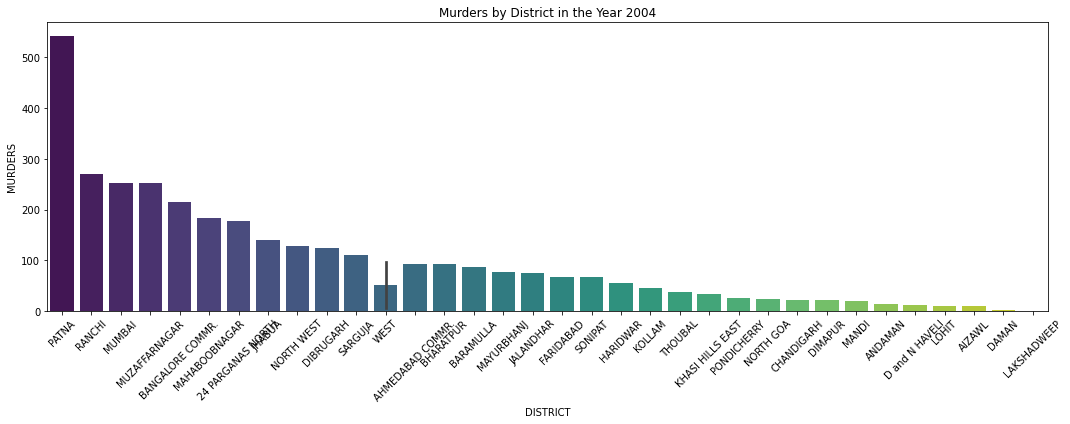

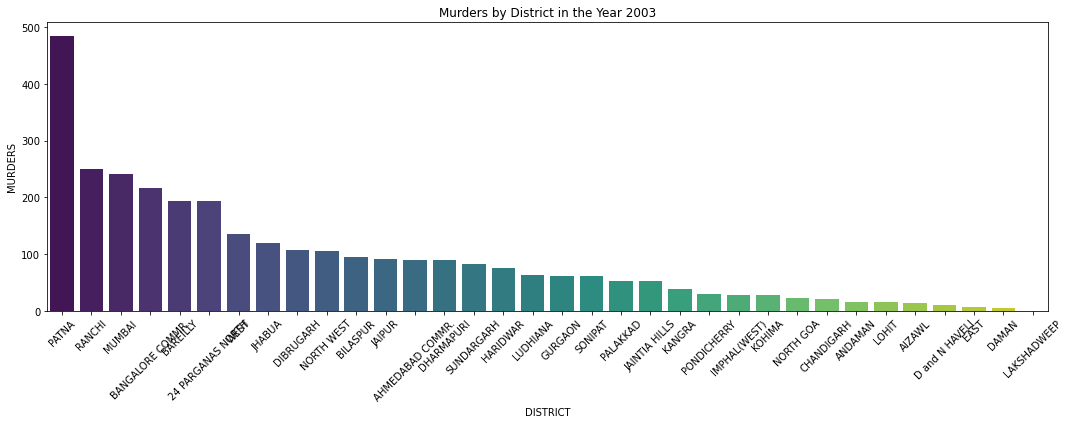

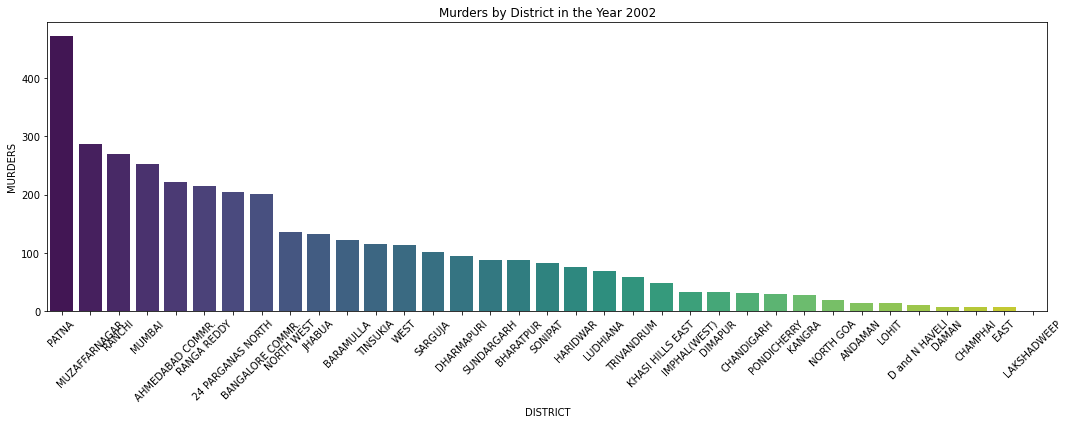

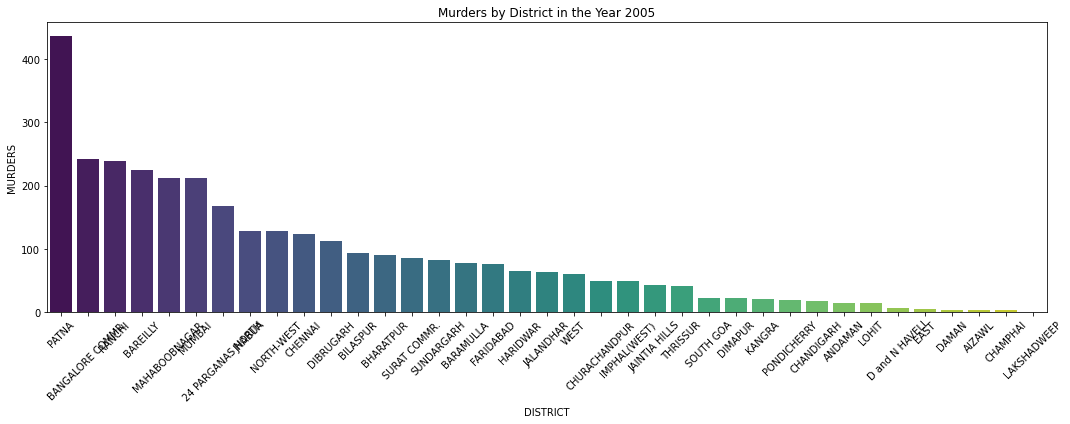

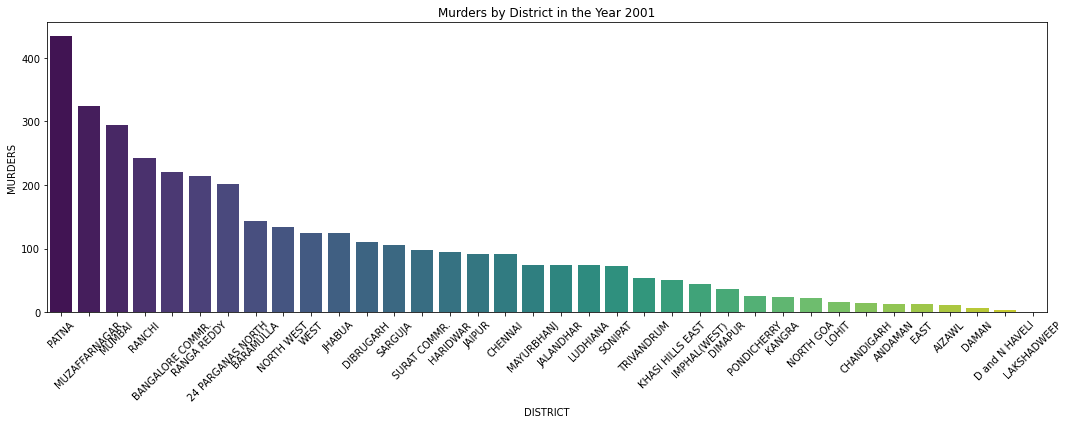

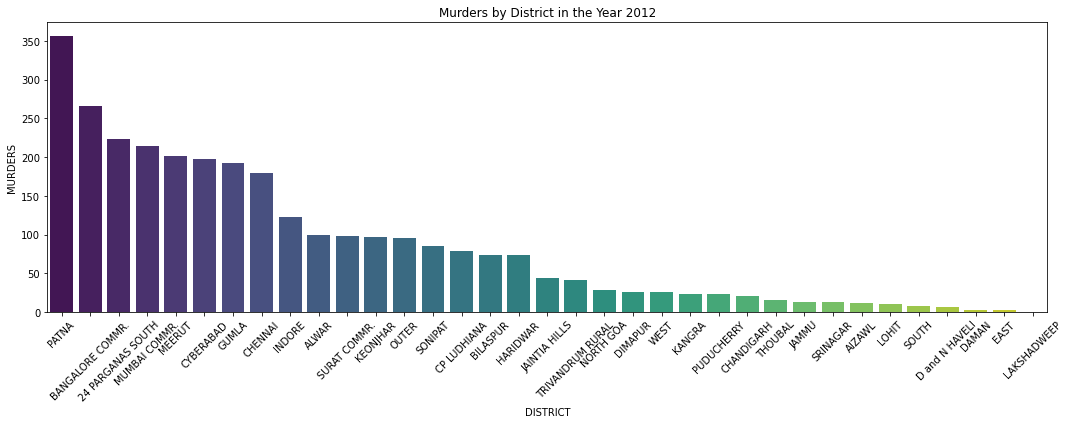

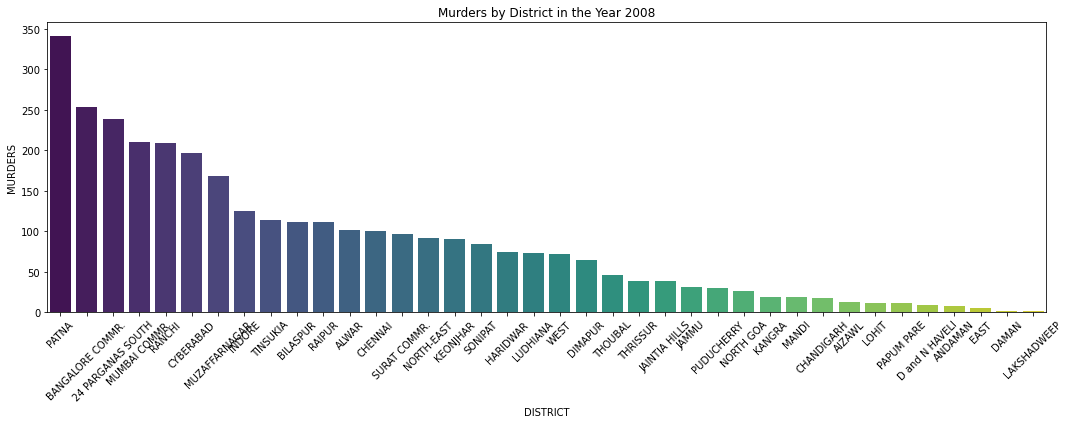

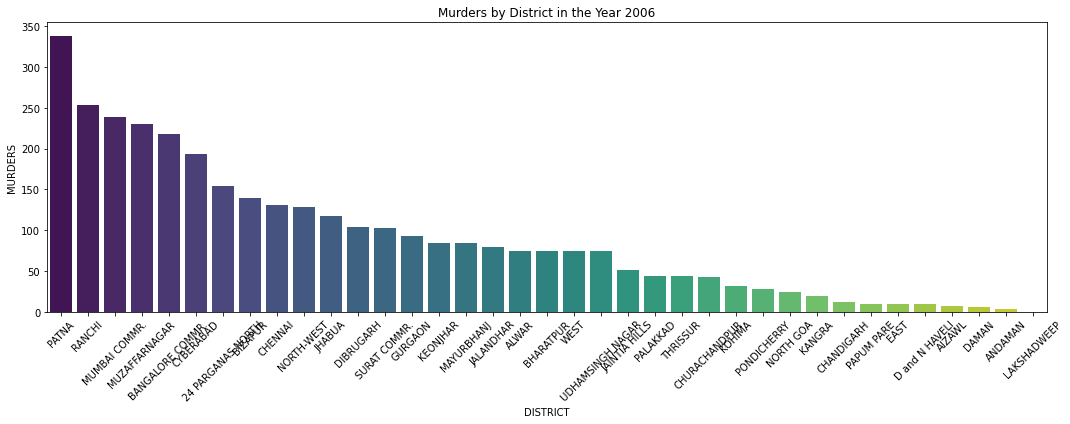

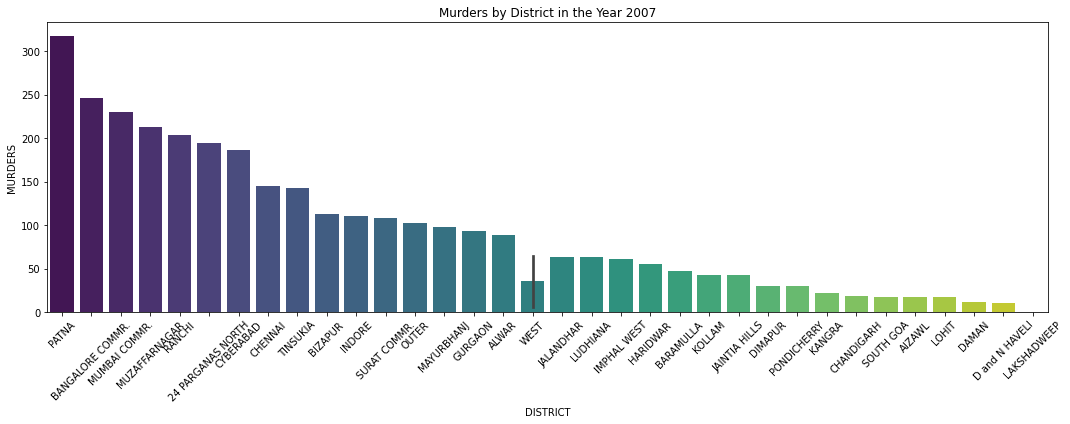

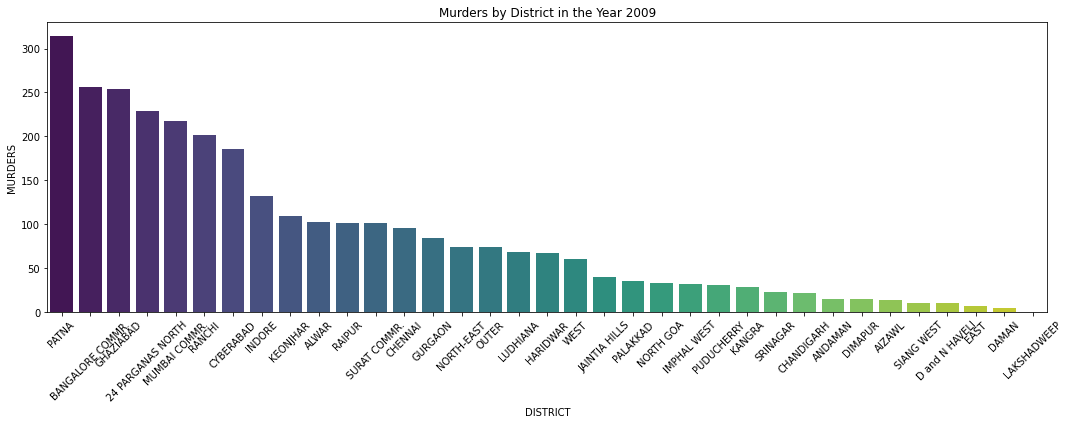

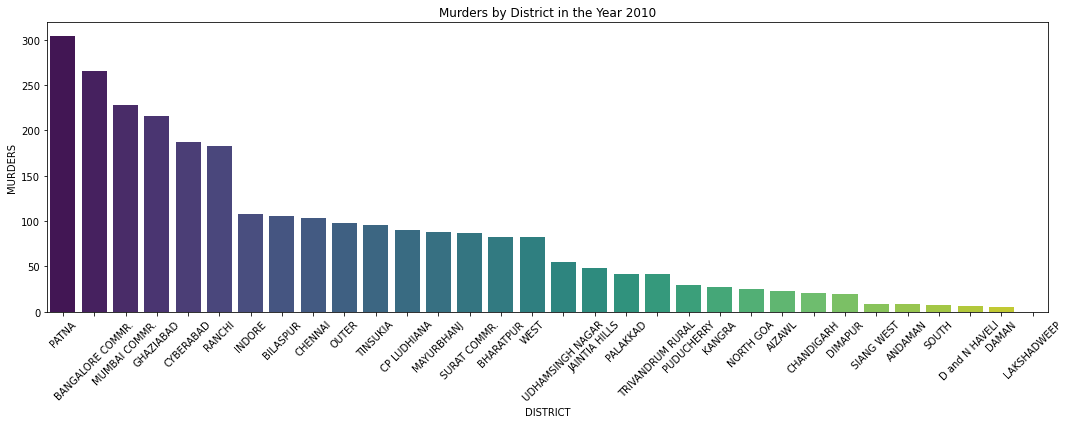

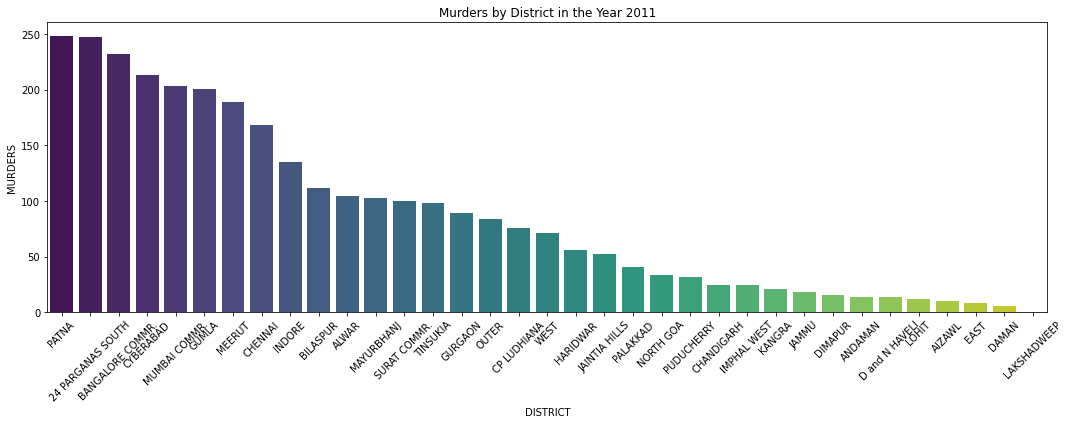

In [130]:
unique_years = sorted_df['YEAR'].unique()

for year in unique_years:
    yearly_data = sorted_df[sorted_df['YEAR'] == year]
    
    plt.figure(figsize=(15, 6))
    sns.barplot(data=yearly_data, x="DISTRICT", y="MURDERS", palette="viridis")
    plt.title(f"Murders by District in the Year {year}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()